 #  MOVIE GENRE PREDICTION:

# Importing necessary libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Loading the datasets

In [128]:
train_data = pd.read_csv(r"C:\Users\manan\Downloads\archive\Genre Classification Dataset\train_data.txt", sep=":::", header=0, engine='python')
test_dat = pd.read_csv(r"C:\Users\manan\Downloads\archive\Genre Classification Dataset\test_data.txt", sep=":::", header=0, engine='python')
df_test_data_solution = pd.read_csv(r"C:\Users\manan\Downloads\archive\Genre Classification Dataset\test_data_solution.txt", sep=":::", header=0, engine='python')

# Rename columns for clarity

In [131]:
train_data.columns = ['ID', 'movie_name', 'GENRE', 'description']
test_data.columns = ['ID', 'movie_name', 'description']

# Initial data exploration

In [134]:
print("train data columns and sample:")
print(train_data.columns)
print(train_data.head())

print("\n test data columns and sample:")
print(test_data.columns)
print(test_data.head())

train data columns and sample:
Index(['ID', 'movie_name', 'GENRE', 'description'], dtype='object')
   ID                          movie_name          GENRE  \
0   2                       Cupid (1997)       thriller    
1   3   Young, Wild and Wonderful (1980)          adult    
2   4              The Secret Sin (1915)          drama    
3   5             The Unrecovered (2007)          drama    
4   6             Quality Control (2011)    documentary    

                                         description  
0   A brother and sister with a past incestuous r...  
1   As the bus empties the students for their fie...  
2   To help their unemployed father make ends mee...  
3   The film's title refers not only to the un-re...  
4   Quality Control consists of a series of 16mm ...  

 test data columns and sample:
Index(['ID', 'movie_name', 'description'], dtype='object')
   ID                     movie_name  \
0   2      La guerra de papá (1977)    
1   3   Off the Beaten Track (2010)    

In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54213 non-null  int64 
 1   movie_name   54213 non-null  object
 2   GENRE        54213 non-null  object
 3   description  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [138]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54199 non-null  int64 
 1   movie_name   54199 non-null  object
 2   description  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [140]:
train_data.isna().sum(),test_data.isna().sum()

(ID             0
 movie_name     0
 GENRE          0
 description    0
 dtype: int64,
 ID             0
 movie_name     0
 description    0
 dtype: int64)

In [142]:
train_data.count(),test_data.count()

(ID             54213
 movie_name     54213
 GENRE          54213
 description    54213
 dtype: int64,
 ID             54199
 movie_name     54199
 description    54199
 dtype: int64)

In [144]:
train_data.shape,test_data.shape

((54213, 4), (54199, 3))

# visualiztion of data

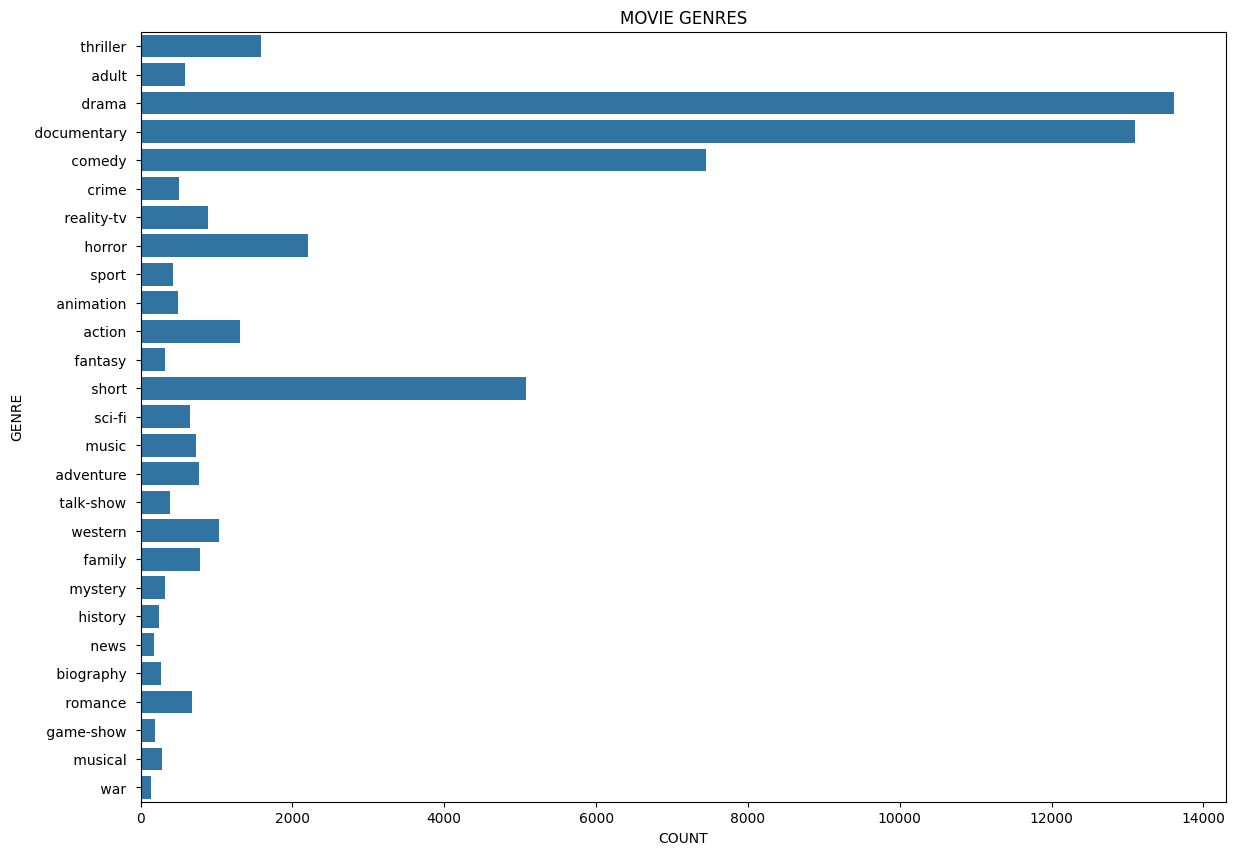

In [148]:
plt.figure(figsize =(14,10))
sns.countplot( y ='GENRE' , data =train_data)
plt.title("MOVIE GENRES")
plt.xlabel('COUNT')
plt.ylabel('GENRE')
plt.show()

# Add a new column for confession length

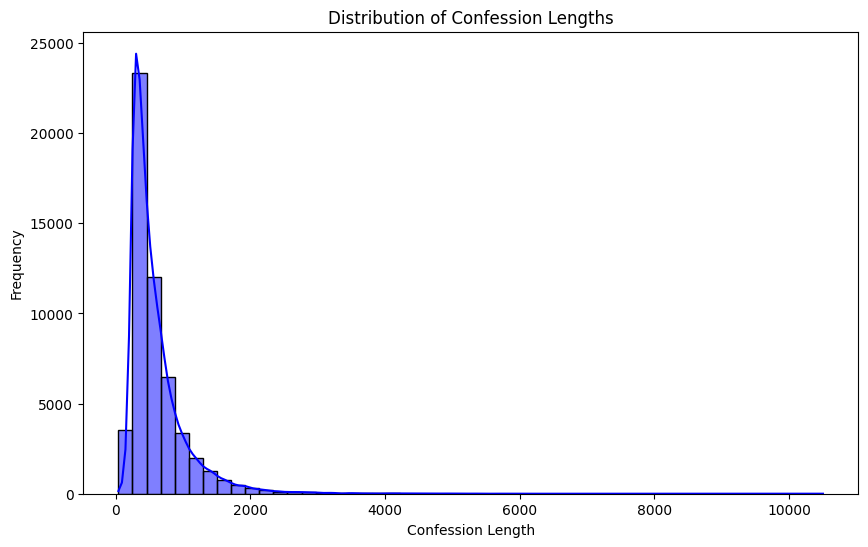

In [174]:
train_data['confession_length'] = train_data['description'].str.len()
plt.figure(figsize = (10,6))
sns.histplot(train_data['confession_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Confession Lengths')
plt.xlabel('Confession Length')
plt.ylabel('Frequency')
plt.show()

# Define column names

In [154]:
plot_column = 'description'
genre_column = 'GENRE'

# Fill missing values in the description column

In [156]:
train_data[plot_column].fillna('',inplace = True)
test_data[plot_column].fillna('',inplace = True)

C:\Users\manan\AppData\Local\Temp\ipykernel_8164\3240802711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[plot_column].fillna('',inplace = True)
C:\Users\manan\AppData\Local\Temp\ipykernel_8164\3240802711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

# Encode genre labels to numerical values

In [48]:
label_encoder = LabelEncoder()
train_data['genre_encoded'] = label_encoder.fit_transform(train_data[genre_column])

# Vectorize text data using TF-IDF

In [52]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data[plot_column])
X_test_tfidf = tfidf_vectorizer.transform(test_data[plot_column])

# Prepare features and labels for training

In [54]:
X = X_train_tfidf
y = train_data['genre_encoded']

# Split the data into training and validation sets

In [56]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.3,random_state = 42)

# Train Logistic Regression model

In [58]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [59]:
y_val_pred = log_reg.predict(X_val)

# Print Logistic Regression results

In [72]:
print("logistic regression")
print("accuracy" , accuracy_score(y_val,y_val_pred))
print(classification_report(y_val,y_val_pred, target_names =label_encoder.classes_))

logistic regression
accuracy 0.5771028037383178
               precision    recall  f1-score   support

      action        0.44      0.24      0.31       384
       adult        0.58      0.19      0.29       174
   adventure        0.58      0.10      0.17       245
   animation        0.70      0.04      0.08       156
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.59      0.55      2227
       crime        0.31      0.02      0.04       168
 documentary        0.65      0.85      0.74      3842
       drama        0.55      0.77      0.64      4164
      family        0.42      0.08      0.13       220
     fantasy        0.33      0.01      0.02        87
   game-show        0.94      0.44      0.60        72
     history        0.00      0.00      0.00        79
      horror        0.70      0.58      0.63       700
       music        0.64      0.33      0.44       222
     musical        0.00      0.00      0.00        82
     mystery    

C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Train Naive Bayes model

In [74]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [76]:
y_val_pred = nb.predict(X_val)

# Print Naive Bayes results

In [78]:
print("naive bayes")
print("accuracy" , accuracy_score(y_val,y_val_pred))
print(classification_report(y_val,y_val_pred, target_names =label_encoder.classes_))

naive bayes
accuracy 0.5144490900147565
               precision    recall  f1-score   support

      action        0.52      0.06      0.11       384
       adult        0.73      0.06      0.12       174
   adventure        0.67      0.03      0.06       245
   animation        0.00      0.00      0.00       156
   biography        0.00      0.00      0.00        61
      comedy        0.49      0.42      0.45      2227
       crime        0.00      0.00      0.00       168
 documentary        0.56      0.88      0.68      3842
       drama        0.46      0.83      0.59      4164
      family        0.00      0.00      0.00       220
     fantasy        0.00      0.00      0.00        87
   game-show        1.00      0.12      0.22        72
     history        0.00      0.00      0.00        79
      horror        0.78      0.34      0.47       700
       music        0.94      0.08      0.14       222
     musical        0.00      0.00      0.00        82
     mystery        0.00

C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Train Support Vector Machine model

In [80]:
from sklearn.svm import LinearSVC

In [82]:
svc = LinearSVC(max_iter = 1000)
svc.fit(X_train,y_train)

LinearSVC()

# Print Support Vector Machine results

In [84]:
print("suppport vector machjinee")
print("accuracy" , accuracy_score(y_val,y_val_pred))
print(classification_report(y_val,y_val_pred, target_names =label_encoder.classes_))

suppport vector machjinee
accuracy 0.5144490900147565
               precision    recall  f1-score   support

      action        0.52      0.06      0.11       384
       adult        0.73      0.06      0.12       174
   adventure        0.67      0.03      0.06       245
   animation        0.00      0.00      0.00       156
   biography        0.00      0.00      0.00        61
      comedy        0.49      0.42      0.45      2227
       crime        0.00      0.00      0.00       168
 documentary        0.56      0.88      0.68      3842
       drama        0.46      0.83      0.59      4164
      family        0.00      0.00      0.00       220
     fantasy        0.00      0.00      0.00        87
   game-show        1.00      0.12      0.22        72
     history        0.00      0.00      0.00        79
      horror        0.78      0.34      0.47       700
       music        0.94      0.08      0.14       222
     musical        0.00      0.00      0.00        82
     myste

C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Define the new movie description

In [86]:
new_description = ["13 ::: Tip 2 (1990) ::: drama ::: Young-ja initially mocks the shy, introverted Ki-hoon who is infatuated with her. She in turn, is fascinated with Dong-hyeok, a worldly small time criminal. After promising to change his ways, Dong-hyeok betrays Young-ja and sells her into prostitution. Only Ki-hoon cares enough about her to attempt a rescue."]

# Vectorize the new description using the same TfidfVectorizer

In [176]:
new_description_tfidf = tfidf_vectorizer.transform(new_description)

# Predict using the trained Logistic Regression model

In [178]:
log_reg_prediction = log_reg.predict(new_description_tfidf)
log_reg_genre = label_encoder.inverse_transform(log_reg_prediction)
print(f"Logistic Regression prediction: {log_reg_genre[0]}")

Logistic Regression prediction:  drama 


# Predict using the trained Naive Bayes model

In [180]:
nb_prediction = nb.predict(new_description_tfidf)
nb_genre = label_encoder.inverse_transform(nb_prediction)
print(f"Naive Bayes prediction: {nb_genre[0]}")

Naive Bayes prediction:  drama 


# Predict using the trained Support Vector Machine model

In [182]:
svc_prediction = svc.predict(new_description_tfidf)
svc_genre = label_encoder.inverse_transform(svc_prediction)
print(f"Support Vector Machine prediction: {svc_genre[0]}")

Support Vector Machine prediction:  drama 
